In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("../data/Life Expectancy Data.csv")
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# حذف ستون‌هایی که مقدار زیاد Missing دارند
missing = df.isnull().sum()
df = df.drop(columns=missing[missing > 500].index)

# پر کردن مقادیر خالی با میانگین هر ستون
df = df.fillna(df.mean(numeric_only=True))


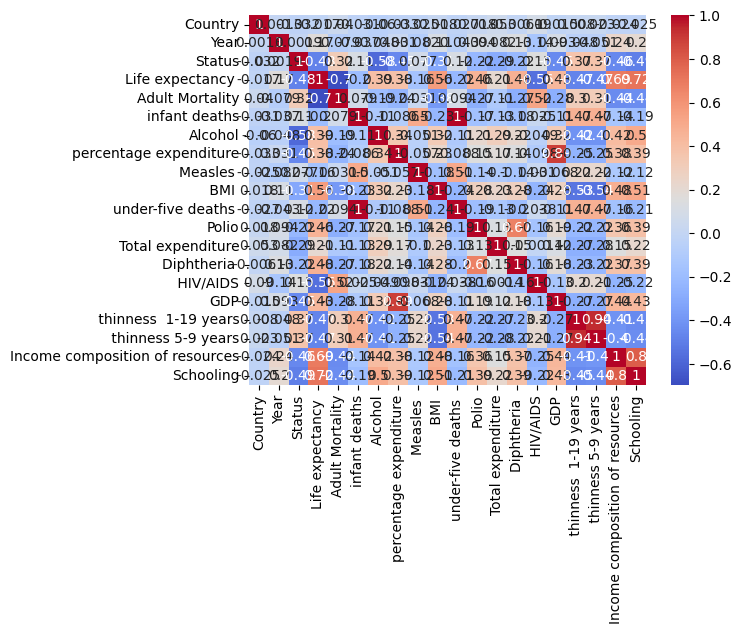

In [5]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
# حذف ستون غیر عددی 'Country' و 'Year'
df = df.select_dtypes(include=[np.number])

X = df.drop("Life expectancy ", axis=1)
y = df["Life expectancy "]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", round(train_error, 2))
print("Test MSE:", round(test_error, 2))
print("R² Score:", round(r2, 3))


Train MSE: 16.91
Test MSE: 15.27
R² Score: 0.824


In [13]:
if train_error < test_error * 0.7:
    print("⚠️ Model may be overfitting. Applying Regularization next.")
else:
    print("✅ No major overfitting detected.")


✅ No major overfitting detected.


In [14]:
ridge_cv = RidgeCV(alphas=[0.1, 1, 10, 50, 100], cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
print("Best alpha (Ridge):", ridge_cv.alpha_)
print("Ridge R²:", round(r2_score(y_test, y_pred_ridge), 3))


Best alpha (Ridge): 0.1
Ridge R²: 0.824


In [15]:
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
print("Best alpha (Lasso):", lasso_cv.alpha_)
print("Lasso R²:", round(r2_score(y_test, y_pred_lasso), 3))


Best alpha (Lasso): 0.001
Lasso R²: 0.824


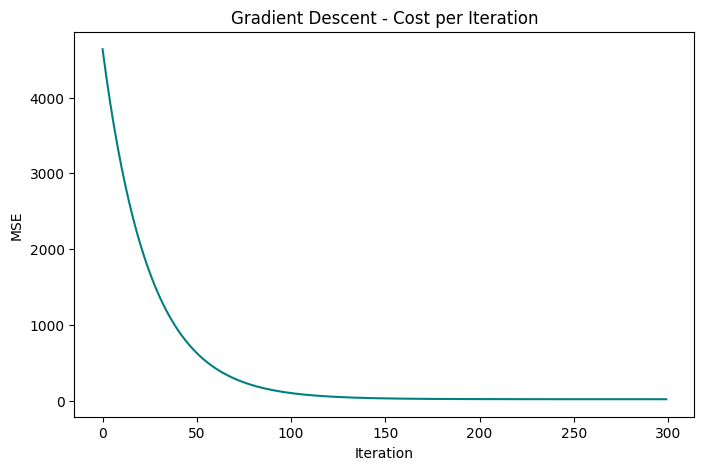

In [16]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.01
n_iterations = 300
m = len(y_train)
cost_history = []

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y_train.values.reshape(-1,1))
    theta = theta - learning_rate * gradients
    cost = np.mean((X_b.dot(theta) - y_train.values.reshape(-1,1))**2)
    cost_history.append(cost)

plt.figure(figsize=(8,5))
plt.plot(cost_history, color='teal')
plt.title("Gradient Descent - Cost per Iteration")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()


/var/folders/43/25gq3lgs5gb321_snh3w2sb40000gn/T/ipykernel_8306/1652043154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="R²", palette="viridis")


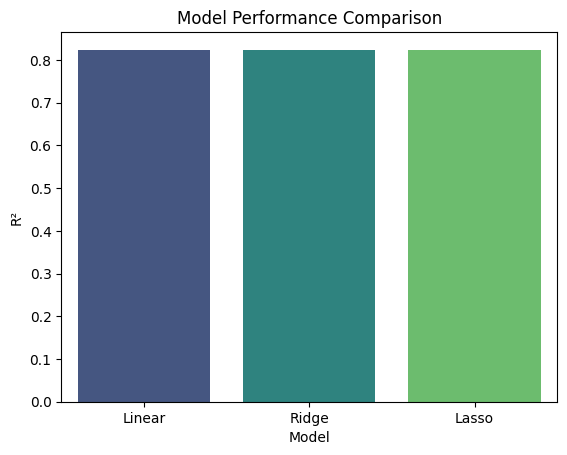

In [17]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R²": [
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
})
sns.barplot(data=results, x="Model", y="R²", palette="viridis")
plt.title("Model Performance Comparison")
plt.show()


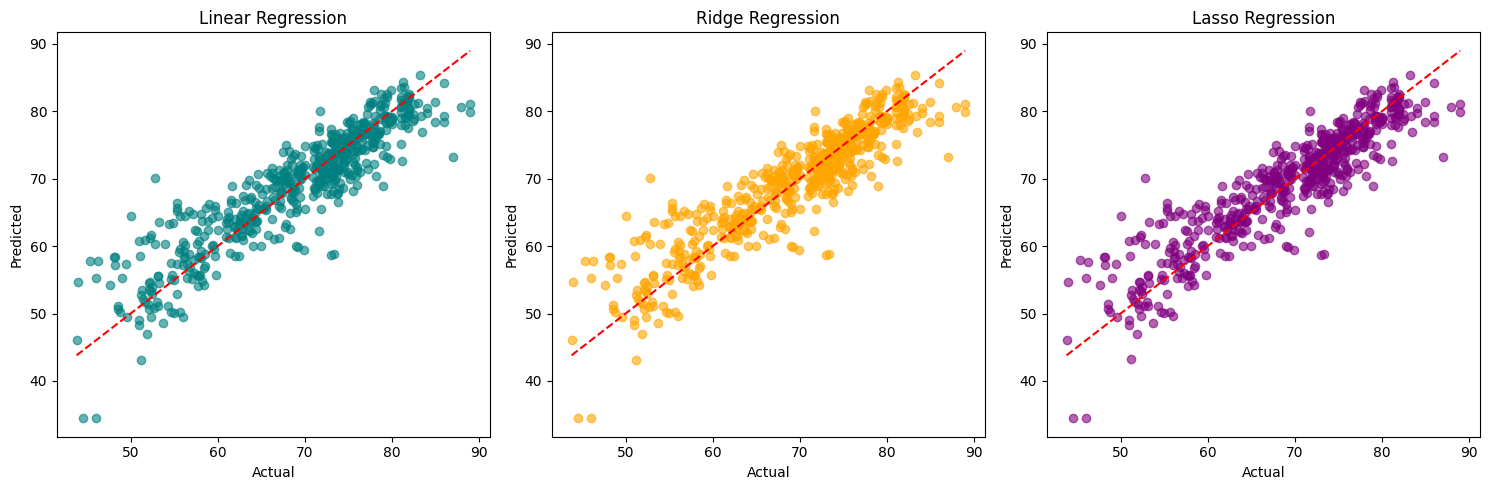

In [19]:
import matplotlib.pyplot as plt

# پلات مقایسه بین مقادیر واقعی و پیش‌بینی‌شده برای هر مدل
plt.figure(figsize=(15, 5))

# --- مدل خطی ---
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# --- مدل Ridge ---
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Ridge Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# --- مدل Lasso ---
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Lasso Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()
